In [5]:
%load_ext autoreload
%autoreload 2
import os
os.chdir('/users/josquin1/Documents/Dropbox/CNRS-CR2/softwares/fgbuster/')
from fgbuster.pysm_helpers import get_instrument, get_sky
import healpy as hp
import numpy as np
from fgbuster.xForecast import xForecast

nside = 32
# define sky and foregrounds simulations
sky = get_sky(nside, 'c1d0s0')
# define instrument
instrument = get_instrument(nside, 'litebird', units='uK_RJ')
# get noiseless frequency maps
freq_maps = instrument.observe(sky, write_outputs=False)[0]
# take only the Q and U maps
freq_maps = freq_maps[:,1:]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
nu (GHz) | sigma_I (uK_CMB amin) | sigma_P (uK_CMB amin) | FWHM (arcmin) 

0040.00 | 30.07 | 42.40 | 00.00 
0050.00 | 18.30 | 25.80 | 00.00 
0060.00 | 14.26 | 20.10 | 00.00 
0068.40 | 11.06 | 15.60 | 00.00 
0078.00 | 08.87 | 12.50 | 00.00 
0088.50 | 07.16 | 10.10 | 00.00 
0100.00 | 08.37 | 11.80 | 00.00 
0118.90 | 06.74 | 09.50 | 00.00 
0140.00 | 05.39 | 07.60 | 00.00 
0166.00 | 04.75 | 06.70 | 00.00 
0195.00 | 03.62 | 05.10 | 00.00 
0234.90 | 04.47 | 06.30 | 00.00 
0280.00 | 07.16 | 10.10 | 00.00 
0337.40 | 07.16 | 10.10 | 00.00 
0402.10 | 13.55 | 19.10 | 00.00 
Instrument attribute 'pixel_indices' not set.


In [6]:
# define components used in the modeling
from fgbuster.component_model import CMB, Dust, Synchrotron
components = [CMB(units='K_RJ'), Dust(350., units='K_RJ'), Synchrotron(20., units='K_RJ')]

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
======= ESTIMATION OF SPECTRAL PARAMETERS =======
Minimization started
Optimization terminated successfully.
         Current function value: -91640.247102
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
======= ESTIMATION OF NOISE AFTER COMP SEP =======
======= COMPUTATION OF CL_FGS =======
======= ESTIMATION OF STAT AND SYS RESIDUALS =======
======= OPTIMIZATION OF COSMO LIKELIHOOD =======
    ===>> fitted r =  [0.00247708]
======= ESTIMATION OF SIGMA(R) =======
    ===>> sigma(r) =  [0.]
======= GRIDDING COSMO LIKELIHOOD =======


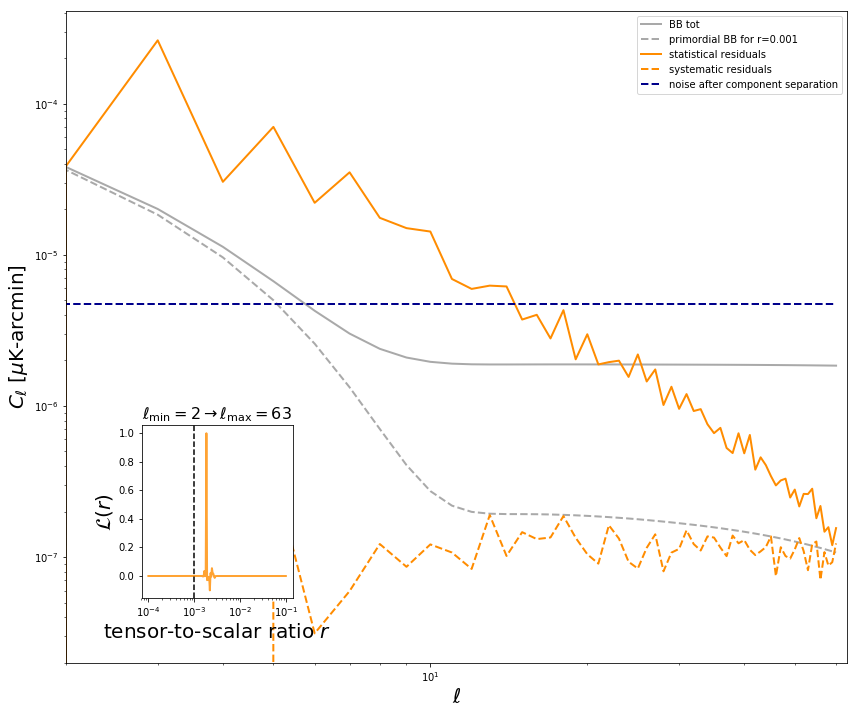

In [7]:
# call for xForecast
# with lmin=2, lmax=2*nside-1, and fsky=0.6
# you can try with make_figure=True if you want to output angular power spectra and profile likelihood on r
res = xForecast(components, instrument, freq_maps, 2, 2*nside-1, 0.6, make_figure=True)